<a href="https://colab.research.google.com/github/misbahsy/APMonitor-do/blob/master/ModelSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulation of Dynamic Systems
Simulation of dynamic systems is the process of finding a numerical solution to a set of differential and algebraic equations (DAEs) with given initial conditions (x0). A mathematical expression of an Initial Value Problem (IVP) is shown below.

$0 = f(dx/dt,x,p)$

$0 < g(dx/dt,x,p)$

$Given  \; x_0 \;  and \;  p$

The DAE can be solved with a variety of analytic or numeric methods. Analytic approaches are possible for simple systems such as systems with one or two equations. Numeric methods are used with more complicated systems but these methods have approximation errors that may deviate from the exact solution. A first step in model development is to draw a schematic, list the assumptions, and write the differential and algebraic equations that describe the system.

In [1]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/hje-dcn2cRw" frameborder="0" allowfullscreen></iframe>

<div class='vspace'></div><ul><li><a class='urllink' href='https://youtu.be/FE4GywqJmv0' rel='nofollow'>Mass Balance Solution</a>
</li><li><a class='urllink' href='https://youtu.be/0ah42LlU_3Y' rel='nofollow'>Species Balance Solution</a>
</li><li><a class='urllink' href='https://youtu.be/AcNTTCjPCDg' rel='nofollow'>Energy Balance Solution</a>
</li><li><a class='urllink' href='https://youtu.be/diasyg2K_oU' rel='nofollow'>Funnel (Mass Balance) Solution</a>
</li></ul><p class='vspace'>Two numerical methods reviewed are sequential and simultaneous simulation techniques.
</p>

In [2]:
#@title Sequential Simulation
%%html
<p>Sequential simulation methods take successive time steps in the simulation horizon and often refine the size of each step to meet a specified error tolerance. Euler's method is the most basic method for sequential simulation while other methods generally offer improved accuracy and therefore allow larger step sizes.
</p>
<div class='vspace'></div>
<iframe width="560" height="315" src="https://www.youtube.com/embed/Oae-S5AzZCk" frameborder="0" allowfullscreen></iframe>

<div class='vspace'></div>
<iframe width="560" height="315" src="https://www.youtube.com/embed/ynm7B0N0_Yw" frameborder="0" allowfullscreen></iframe>

In [3]:
#@title Simultaneous Simulation
%%html
<p>Simultaneous simulation methods are used to converge all of the state variable predictions together instead of one step at a time. Orthogonal collocation on finite elements is a popular method to convert the DAE into a Nonlinear Programming (NLP) problem for solution by efficient solvers.
</p>
<div class='vspace'></div><pre> <em>0 = f(x,p)</em>
 <em>0 &lt; g(x,p)</em>
 Given <em>x<sub>0</sub></em> and <em>p</em>
</pre><p class='vspace'>Further details on orthogonal collocation are provided at the following references.
</p>
<div class='vspace'></div><ul><li>Nonlinear Modeling, Estimation and Predictive Control in APMonitor, Hedengren, J. D. and Asgharzadeh Shishavan, R., Powell, K.M., and Edgar, T.F., Computers and Chemical Engineering, Volume 70, pg. 133–148, 2014. Available at: <a class='urllink' href='https://dx.doi.org/10.1016/j.compchemeng.2014.04.013' rel='nofollow'>https://dx.doi.org/10.1016/j.compchemeng.2014.04.013</a>
</li></ul><div class='vspace'></div>
<iframe width="560" height="315" src="https://www.youtube.com/embed/pOXcOWMo5Hs" frameborder="0" allowfullscreen></iframe>

<div class='vspace'></div>
<iframe width="560" height="315" src="https://www.youtube.com/embed/YvjG2LRNtKU" frameborder="0" allowfullscreen></iframe>


In [4]:
#@title Exercise
%%html
<div><img src='http://apmonitor.com/do/uploads/Main/flight_controls_747.png' alt='' title='' /></div>
<p class='vspace'>This exercise involves the simulation of a Boeing 747 airplane at a cruising altitude of 40,000 ft. In this application<sup>1</sup>, a model of the process is desired to relate the elevator (<em>e</em>) and thrust (<em>t</em>) to the airspeed and climb rate. The model equations are shown below in state space form that relates elevator angle in centi-radians and thrust to four states including airspeed in the horizontal direction (<em>u</em> - <em>u</em> <sub>w</sub>), airspeed in the vertical direction (<em>w</em> - <em>w</em> <sub>w</sub>), rotation of the aircraft (<em>q</em>), and angle of the aircraft (<em>theta</em>).
</p>
<div class='vspace'></div><div><img src='http://apmonitor.com/do/uploads/Main/flight_equations_747.png' alt='' title='' /></div>
<div class='vspace'></div><div><img src='http://apmonitor.com/do/uploads/Main/flight_equations2_747.png' alt='' title='' /></div>
<p class='vspace'>The wind speeds are given in the horizontal (<em>u</em> <sub>w</sub>) and vertical (<em>w</em> <sub>w</sub>) directions with a nominal velocity of the aircraft of <em>u</em><sub>0</sub>=774 ft/sec (0.8 Mach speed). The output <em>y</em><sub>1</sub> is the air speed and <em>y</em><sub>2</sub> is the climb rate.
</p>
<p class='vspace'>Simulate step responses of the aircraft with respect to the elevator angle and thrust. Design a model predictive controller to respond to set point changes in the air speed and climb rate of the aircraft. Explain the coordinated movement of the manipulated variables to achieve the desired set points of the controlled variables.
</p>
<div class='vspace'></div><h4>Solution</h4>
<div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/flight_controls.zip' rel='nofollow'>Flight Controls in MATLAB and Python</a></div>
<div class='vspace'></div>
<iframe width="560" height="315" src="https://www.youtube.com/embed/o_VlhBP4EfY?rel=0" frameborder="0" allowfullscreen></iframe>

apm 34.73.12.88_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.7
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            8
   Intermediates:            0
   Connections  :            8
   Equations    :            0
   Residuals    :            0
 
 
 LTI Model Statistics
 -------------------------------------
 Sparse Matrices
 Continuous Form
 Matrix    Dimension    Non-zeros
   A                 4 x           4                10
   B                 4 x           2                 6
   C                 2 x           4                 3
   D                 2 x           2                 0
   E                 4 x           4                 4
 -------------------------------------
 
 Number of state variables:           1140


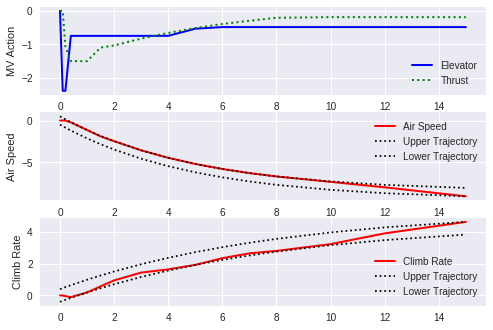

In [5]:
#@title Solution in GEKKO

try:
    from pip import main as pipmain
except:
    from pip._internal import main as pipmain
pipmain(['install','gekko'])

from __future__ import division

from gekko import GEKKO
import numpy as np

## Linear model of a Boeing 747
#  Level flight at 40,000 ft elevation
#  Velocity at 774 ft/sec (0.80 Mach)

# States
#  u - uw (ft/sec) - horizontal velocity - horizontal wind
#  w - ww (ft/sec) - vertical velocity - vertical wind
#  q (crad/sec) - angular velocity
#  theta (crad) - angle from horizontal
# note: crad = 0.01 rad

# Inputs
#  e - elevator
#  t - throttle

# Outputs
#  u - uw (ft/sec) - horizontal airspeed
#  hdot = -w + u0 * theta with u0 = 774 ft/sec


A = np.array([[-.003, 0.039, 0, -0.322],
              [-0.065, -0.319, 7.74, 0],
              [0.020, -0.101, -0.429, 0],
              [0, 0, 1, 0]])

B = np.array([[0.01, 1],
              [-0.18, -0.04],
              [-1.16, 0.598],
              [0, 0]])

C = np.array([[1, 0, 0, 0],
              [0, -1, 0, 7.74]])

#%% Build GEKKO State Space model
m = GEKKO()
x,y,u = m.state_space(A,B,C,D=None)

m.time = [0, 0.1, 0.2, 0.4, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15]
m.options.imode = 6
m.options.nodes = 3

## MV tuning
# lower and upper bounds for elevator pitch
# lower and upper bounds for thrust
# delta MV movement cost
for i in range(len(u)):
    u[i].lower = -5
    u[i].upper = 5
    u[i].dcost = 1
    u[i].status = 1

## CV tuning
# tau = first order time constant for trajectories
y[0].tau = 5
y[1].tau = 8
# tr_init = 0 (dead-band)
#         = 1 (first order trajectory)
#         = 2 (first order traj, re-center with each cycle)
y[0].tr_init = 2
y[1].tr_init = 2
# targets (dead-band needs upper and lower values)
# SPHI = upper set point
# SPLO = lower set point
y[0].sphi= -8.5
y[0].splo= -9.5
y[1].sphi= 5.4
y[1].splo= 4.6

y[0].status = 1
y[1].status = 1


m.solve()

# get additional solution information (trajectories)
import json
with open(m.path+'//results.json') as f:
    results = json.load(f)
# get internal GEKKO variable names
air_speed = y[0].name
climb_rate = y[1].name

#%% plot results
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(311)
plt.plot(m.time,u[0],'b-',linewidth=2.0)
plt.plot(m.time,u[1],'g:',linewidth=2.0)
plt.legend(['Elevator','Thrust'])
plt.ylabel('MV Action')

plt.subplot(312)
plt.plot(m.time,y[0],'r-',linewidth=2.0)
plt.plot(m.time,results[air_speed+'.tr_hi'],'k:')
plt.plot(m.time,results[air_speed+'.tr_lo'],'k:')
plt.legend(['Air Speed','Upper Trajectory','Lower Trajectory'])
plt.ylabel('Air Speed')

plt.subplot(313)
plt.plot(m.time,y[1],'r-',linewidth=2.0)
plt.plot(m.time,results[climb_rate+'.tr_hi'],'k:')
plt.plot(m.time,results[climb_rate+'.tr_lo'],'k:')
plt.legend(['Climb Rate','Upper Trajectory','Lower Trajectory'])
plt.ylabel('Climb Rate')

plt.show()
